<a href="https://colab.research.google.com/github/debashisdotchatterjee/Circular-Statistical-Thinking-in-Human-Cognition-Temporal-Constructs-Anthropological-Studies_Part_1/blob/main/Circular_Statistical_Philosophy_paper_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following Python script  simulates different circular statistical concepts related to f Circular Statistical Thinking in
Human Cognition, Temporal Constructs &
Anthropological Studies, including generating von Mises distributions, calculating circular mean and variance, analyzing phase differences, and synchronization analysis using order parameters. The outputs are saved in a separate directory, with plots and summary data for visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import vonmises

# Create a directory to save all outputs
output_dir = "circular_stat_outputs"
os.makedirs(output_dir, exist_ok=True)

# Set a random seed for reproducibility
np.random.seed(42)

# Helper function to save and close plots
def save_and_close_plot(filename):
    plt.savefig(os.path.join(output_dir, filename))
    plt.close()

# 1. Generate Circular Data from Von Mises Distribution and Rose Plots
mu = np.pi / 2  # Mean direction
kappa_values = [0.5, 2, 10]  # Different concentration parameters
angles = np.linspace(0, 2 * np.pi, 1000)

# Plot von Mises distributions with different kappa values to illustrate the concentration of data
for kappa in kappa_values:
    vm_pdf = vonmises.pdf(angles, kappa, loc=mu)
    plt.figure(figsize=(10, 6))
    plt.polar(angles, vm_pdf, label=f'kappa = {kappa}', linewidth=2)
    plt.title(f'Von Mises Distribution (mu={mu:.2f}, kappa={kappa})')
    plt.fill(angles, vm_pdf, alpha=0.3)
    plt.legend()
    plot_filename = f"von_mises_kappa_{kappa}.png"
    save_and_close_plot(plot_filename)

# Generate and plot rose plots (circular histograms) to depict sample distributions
n_samples = 500
for kappa in kappa_values:
    samples = vonmises.rvs(kappa=kappa, loc=mu, size=n_samples)
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 2 * np.pi, 18)
    counts, _ = np.histogram(samples, bins=bins)
    plt.polar(bins[:-1], counts, 'r-', label=f'Samples (kappa = {kappa})', linewidth=2)
    plt.title(f'Rose Plot of Samples from Von Mises Distribution (kappa = {kappa})')
    plt.fill(bins[:-1], counts, alpha=0.4)
    plt.legend()
    plot_filename = f"rose_plot_kappa_{kappa}.png"
    save_and_close_plot(plot_filename)

# 2. Circular Mean and Variance Demonstration with Visual Interpretation
samples = vonmises.rvs(kappa=2, loc=mu, size=n_samples)

# Calculate circular mean direction and variance
mean_direction = np.arctan2(np.sum(np.sin(samples)), np.sum(np.cos(samples)))
mean_resultant_length = np.sqrt(np.sum(np.cos(samples))**2 + np.sum(np.sin(samples))**2) / n_samples
circular_variance = 1 - mean_resultant_length

# Plot the samples, their distribution, and mean direction
plt.figure(figsize=(10, 6))
plt.polar(samples, np.ones_like(samples), 'o', label='Samples', alpha=0.6)
plt.polar([0, mean_direction], [0, 1], label='Mean Direction', color='r', linewidth=3)
plt.title(f'Circular Mean and Variance (Variance={circular_variance:.2f})')
plt.legend()
plot_filename = "circular_mean_variance.png"
save_and_close_plot(plot_filename)

# 3. Phase Analysis Between Two Sets of Circular Data
# Generate two sets of circular data with different mean directions
samples_1 = vonmises.rvs(kappa=5, loc=np.pi / 3, size=n_samples)
samples_2 = vonmises.rvs(kappa=5, loc=2 * np.pi / 3, size=n_samples)

# Calculate phase differences
delta_phi = (samples_2 - samples_1) % (2 * np.pi)

# Plot histogram of phase differences
plt.figure(figsize=(10, 6))
plt.hist(delta_phi, bins=20, density=True, alpha=0.7, color='g', edgecolor='black')
plt.xlabel('Phase Difference (radians)')
plt.ylabel('Density')
plt.title('Phase Difference Distribution Between Two Sets of Circular Data')
plot_filename = "phase_difference.png"
save_and_close_plot(plot_filename)

# Visualize both sets on a polar plot
plt.figure(figsize=(10, 6))
plt.polar(samples_1, np.ones_like(samples_1), 'o', alpha=0.5, label='Samples Set 1', color='b')
plt.polar(samples_2, np.ones_like(samples_2), 'o', alpha=0.5, label='Samples Set 2', color='orange')
plt.title('Two Sets of Circular Data with Different Mean Directions')
plt.legend()
plot_filename = "two_circular_sets.png"
save_and_close_plot(plot_filename)

# 4. Synchronization Analysis with Order Parameter Visualization
n_groups = 50
n_time_points = 100
t = np.linspace(0, 2 * np.pi, n_time_points)

# Generate random phases for each group at each time point to simulate synchronization
phases = np.array([2 * np.pi * np.random.rand(n_groups) for _ in t])
order_parameters = []

# Calculate order parameter over time to study synchronization
for phase_set in phases:
    R = np.abs(np.sum(np.exp(1j * phase_set)) / n_groups)
    order_parameters.append(R)

# Plot order parameter over time to visualize the synchronization
plt.figure(figsize=(10, 6))
plt.plot(t, order_parameters, label='Order Parameter R(t)', color='b', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Order Parameter (R)')
plt.title('Synchronization Analysis Using Order Parameter')
plt.legend()
plot_filename = "order_parameter.png"
save_and_close_plot(plot_filename)

# Polar representation of synchronization at specific time points
time_points_to_plot = [0, n_time_points // 2, n_time_points - 1]
for idx in time_points_to_plot:
    plt.figure(figsize=(10, 6))
    plt.polar(phases[idx], np.ones_like(phases[idx]), 'o', label=f'Time Point {idx}', alpha=0.7)
    plt.title(f'Synchronization at Time Point {idx}')
    plt.legend()
    plot_filename = f"synchronization_time_point_{idx}.png"
    save_and_close_plot(plot_filename)

# Save summary statistics to a CSV file
output_data = {
    "Mean Direction (radians)": [mean_direction],
    "Circular Variance": [circular_variance],
    "Order Parameter Mean": [np.mean(order_parameters)],
    "Order Parameter Std": [np.std(order_parameters)]
}
output_df = pd.DataFrame(output_data)
output_csv_filename = os.path.join(output_dir, "circular_statistics_summary.csv")
output_df.to_csv(output_csv_filename, index=False)

print(f"Simulation completed. Outputs saved in '{output_dir}' directory.")

Simulation completed. Outputs saved in 'circular_stat_outputs' directory.


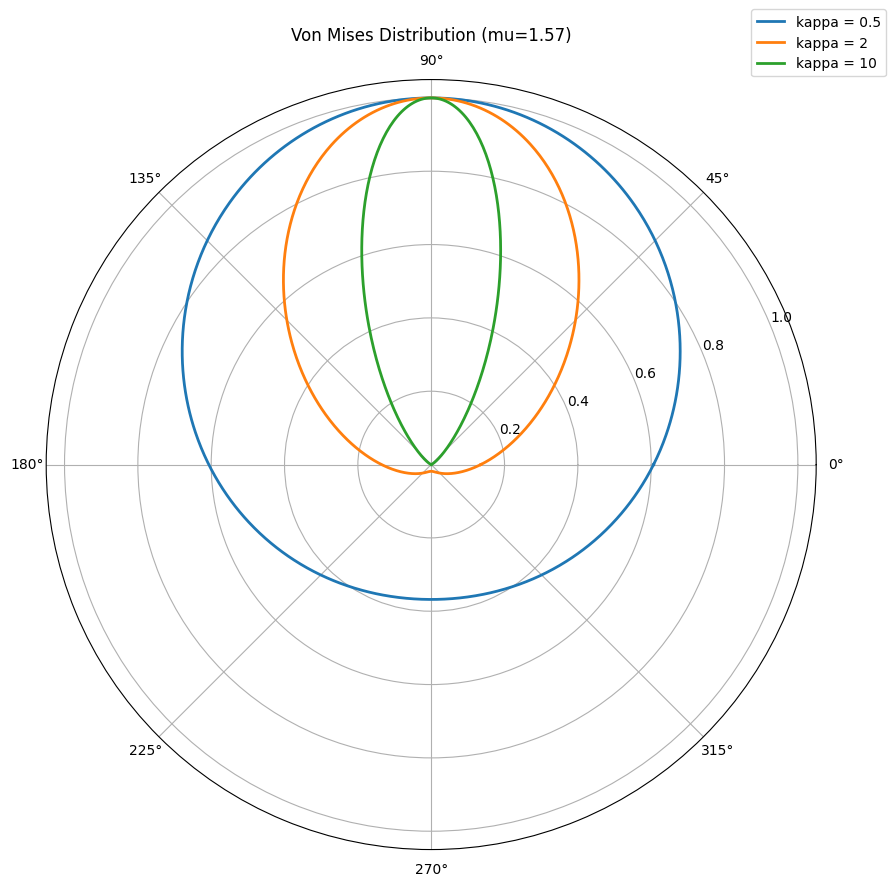

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises

# Create a directory to save the output
output_dir = "circular_stat_outputs"
os.makedirs(output_dir, exist_ok=True)

# Parameters for the von Mises distribution
mu = np.pi / 2  # Mean direction
kappa_values = [0.5, 2, 10]  # Different concentration parameters
angles = np.linspace(0, 2 * np.pi, 1000)

# Plot von Mises distributions with different kappa values to illustrate the concentration of data
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')

for kappa in kappa_values:
    vm_pdf = vonmises.pdf(angles, kappa, loc=mu)
    # Normalize the pdf to have values between 0 and 1 for better visualization on the periphery
    vm_pdf_normalized = vm_pdf / np.max(vm_pdf)
    ax.plot(angles, vm_pdf_normalized, label=f'kappa = {kappa}', linewidth=2)

# Set the title and legend
ax.set_title(f'Von Mises Distribution (mu={mu:.2f})', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Save and show the plot
plot_filename = "von_mises_kappa_periphery.png"
plt.savefig(os.path.join(output_dir, plot_filename))
plt.show()

The Python code provided overlays the von Mises PDF and the rose plots of simulated datasets on a polar plot, depicting different concentration parameters (κ). The rose plots are overlaid transparently to highlight the alignment between the simulated data and the theoretical von Mises distribution.

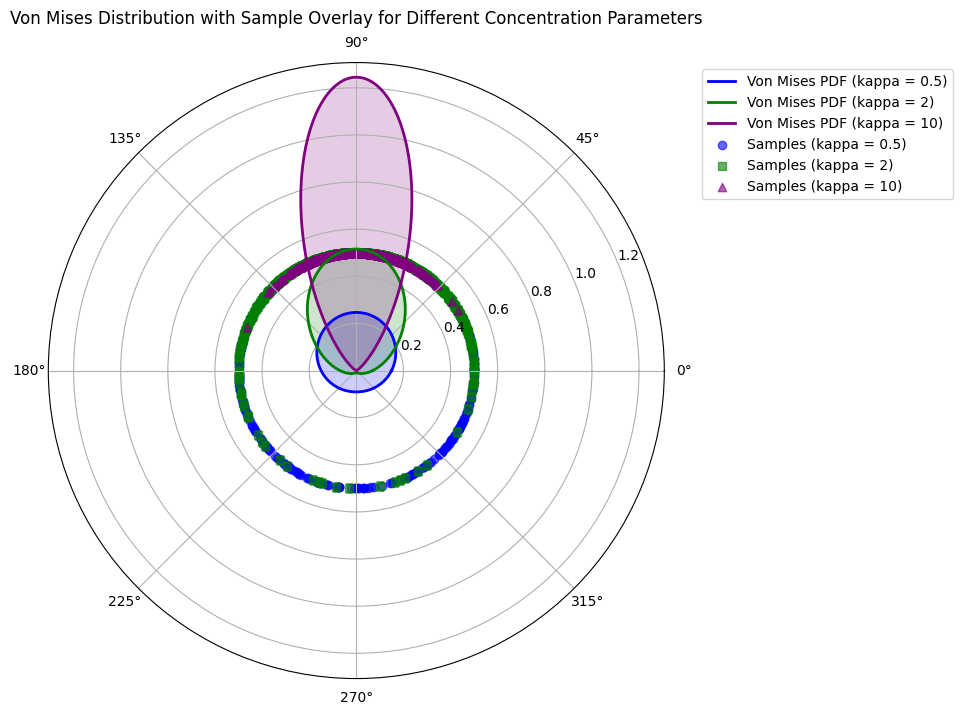

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for von Mises distribution
mu = np.pi / 2  # Mean direction
kappa_values = [0.5, 2, 10]  # Different concentration parameters
n_samples = 500
angles = np.linspace(0, 2 * np.pi, 1000)

# Create figure for plotting
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Plot von Mises distributions with different kappa values to illustrate the concentration of data
colors = ['blue', 'green', 'purple']
for kappa, color in zip(kappa_values, colors):
    vm_pdf = vonmises.pdf(angles, kappa, loc=mu)
    ax.plot(angles, vm_pdf, label=f'Von Mises PDF (kappa = {kappa})', color=color, linewidth=2)
    ax.fill(angles, vm_pdf, color=color, alpha=0.2)

# Overlay scatter plot of simulated datasets to depict sample distributions
markers = ['o', 's', '^']
for kappa, color, marker in zip(kappa_values, colors, markers):
    samples = vonmises.rvs(kappa=kappa, loc=mu, size=n_samples)
    ax.scatter(samples, np.ones_like(samples) * 0.5, color=color, alpha=0.6, label=f'Samples (kappa = {kappa})', marker=marker)

# Set title and legend
ax.set_title('Von Mises Distribution with Sample Overlay for Different Concentration Parameters', va='bottom')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Save plot
plot_filename = "von_mises_sample_overlay_plot.png"
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

Adjusted the scatter plot to position the sample points at different radii, which makes them more distinguishable and avoids overlap

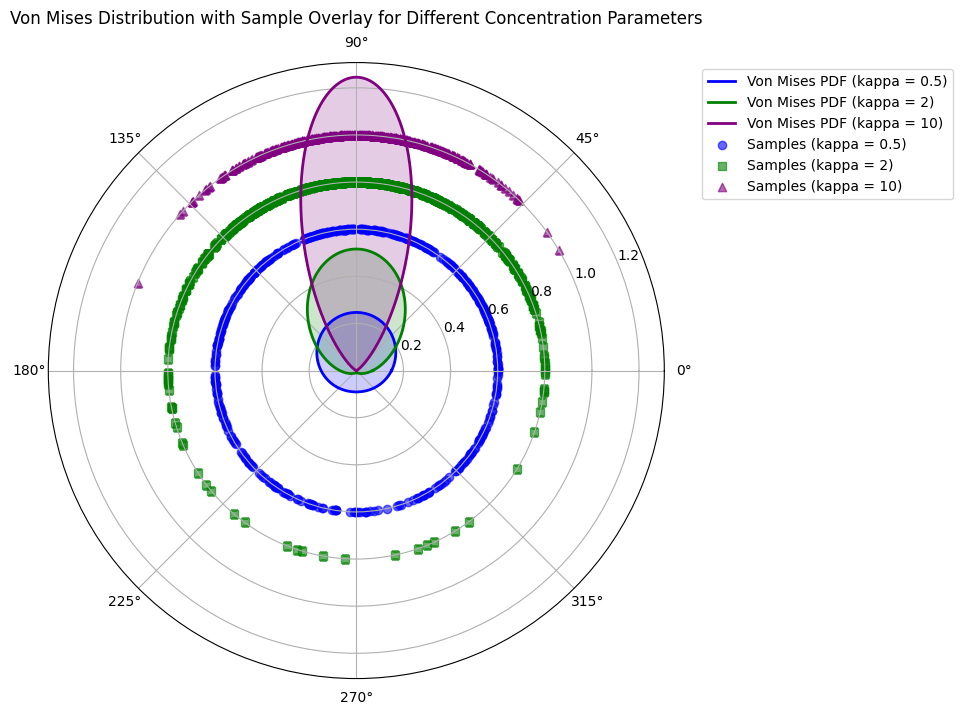

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for von Mises distribution
mu = np.pi / 2  # Mean direction
kappa_values = [0.5, 2, 10]  # Different concentration parameters
n_samples = 500
angles = np.linspace(0, 2 * np.pi, 1000)

# Create figure for plotting
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Plot von Mises distributions with different kappa values to illustrate the concentration of data
colors = ['blue', 'green', 'purple']
for kappa, color in zip(kappa_values, colors):
    vm_pdf = vonmises.pdf(angles, kappa, loc=mu)
    ax.plot(angles, vm_pdf, label=f'Von Mises PDF (kappa = {kappa})', color=color, linewidth=2)
    ax.fill(angles, vm_pdf, color=color, alpha=0.2)

# Overlay scatter plot of simulated datasets to depict sample distributions at different radii
markers = ['o', 's', '^']
radii = [0.6, 0.8, 1.0]  # Different radii for each set of samples
for kappa, color, marker, radius in zip(kappa_values, colors, markers, radii):
    samples = vonmises.rvs(kappa=kappa, loc=mu, size=n_samples)
    ax.scatter(samples, np.ones_like(samples) * radius, color=color, alpha=0.6, label=f'Samples (kappa = {kappa})', marker=marker)

# Set title and legend
ax.set_title('Von Mises Distribution with Sample Overlay for Different Concentration Parameters', va='bottom')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Save plot
plot_filename = "von_mises_sample_overlay_plot.png"
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

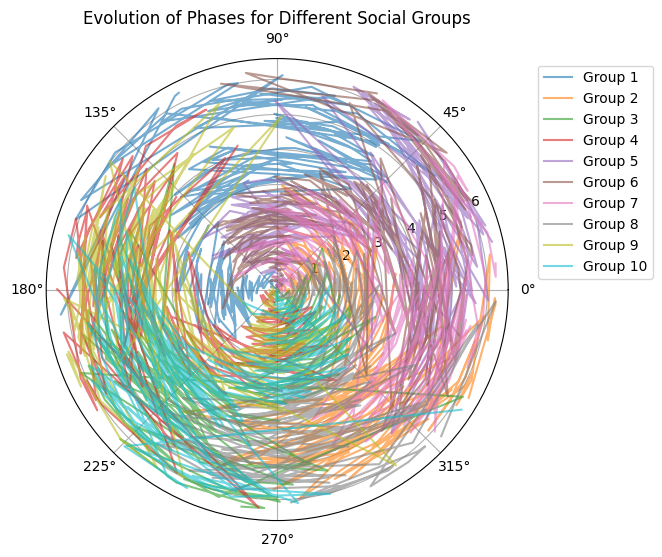

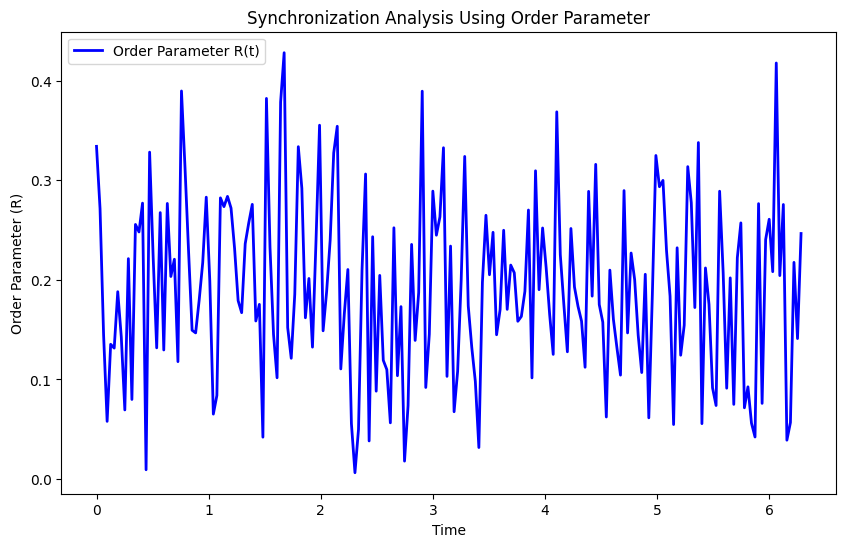

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for synchronization analysis
n_groups = 10  # Number of social groups
n_time_points = 200  # Number of time points
kappa = 5  # Concentration parameter for the von Mises distribution

# Generate random initial phases for each group
initial_phases = 2 * np.pi * np.random.rand(n_groups)

# Simulate the evolution of phases over time
t = np.linspace(0, 2 * np.pi, n_time_points)
phases = np.zeros((n_groups, n_time_points))
for i in range(n_groups):
    phases[i, :] = initial_phases[i] + np.sin(t) + vonmises.rvs(kappa=kappa, size=n_time_points)

# Calculate the order parameter R(t) over time
order_parameters = []
for time_idx in range(n_time_points):
    R_t = np.abs(np.sum(np.exp(1j * phases[:, time_idx])) / n_groups)
    order_parameters.append(R_t)

# Plot the evolution of phases for each group
plt.figure(figsize=(12, 6))
for i in range(n_groups):
    plt.polar(phases[i, :], t, label=f'Group {i+1}', alpha=0.6)
plt.title('Evolution of Phases for Different Social Groups')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plot_filename = "phase_evolution_plot.png"
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()

# Plot the order parameter over time
plt.figure(figsize=(10, 6))
plt.plot(t, order_parameters, label='Order Parameter R(t)', color='b', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Order Parameter (R)')
plt.title('Synchronization Analysis Using Order Parameter')
plt.legend()
plot_filename = "order_parameter_plot.png"
plt.savefig(plot_filename, bbox_inches='tight')
plt.show()